In [8]:
## import a bunch of stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## read data set
indicators = pd.read_csv(r'C:\Users\kjagadeesh\Dropbox\analysis_covid\data\data_processed_final.csv')
# print only top portion of dataset
indicators.head()

# summarize the variables
indicators.describe()



,lg_district_code,census_2001_code,census_2011_code,district_code,state_code,pop_density_total,pop_density_rural,pop_density_urban,persons_total,persons_rural,...,remoteness_score,docs_per_million,beds_per_million,adult_mortality,urbanisation,elderly,confirmed,deceased,confirmed_log,deceased_log
count,733.000000,617.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,7.330000e+02,7.330000e+02,...,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,367.000000,15.320908,280.395634,328.009550,17.503411,930.478770,403.045512,3841.747912,1.969458e+06,1.341415e+06,...,1.485075,1.747690,3.116934,42.224216,26.723129,8.262062,101.267394,3.431105,0.988303,0.115561
std,211.743162,13.423694,202.864141,181.497877,9.255130,3168.209003,616.914984,3856.075247,1.611071e+06,1.041919e+06,...,0.285344,0.398383,0.478374,9.412675,21.025555,2.057642,732.344703,30.397498,0.859262,0.346923
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.876766,0.000000,0.000000,8.004000e+03,0.000000e+00,...,0.000000,0.000000,0.000000,21.450000,0.000000,2.456208,0.000000,0.000000,0.000000,0.000000
25%,184.000000,5.000000,92.000000,176.000000,9.000000,199.815059,164.033274,1960.120106,8.174200e+05,5.736620e+05,...,1.335182,1.508702,2.916007,35.450000,12.221041,6.980409,1.000000,0.000000,0.000000,0.000000
50%,367.000000,12.000000,275.000000,325.000000,18.000000,359.533957,252.812780,2958.000000,1.634409e+06,1.119257e+06,...,1.485866,1.741448,3.147397,41.350000,20.133623,8.068114,10.000000,0.000000,1.000000,0.000000
75%,550.000000,21.000000,457.000000,486.000000,24.000000,700.018330,488.000000,4675.000000,2.741239e+06,1.903337e+06,...,1.634660,1.982243,3.380289,48.300000,34.297733,9.493645,43.000000,1.000000,1.633468,0.000000
max,733.000000,70.000000,640.000000,640.000000,35.000000,36155.000000,13074.000000,46867.000000,1.106015e+07,6.074188e+06,...,3.028810,3.021310,4.333108,74.850000,100.000000,17.820349,16738.000000,621.000000,4.223704,2.793092


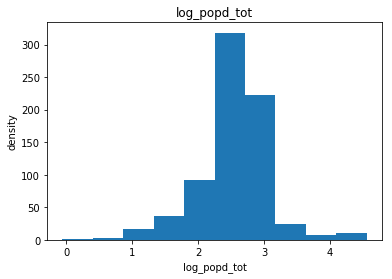

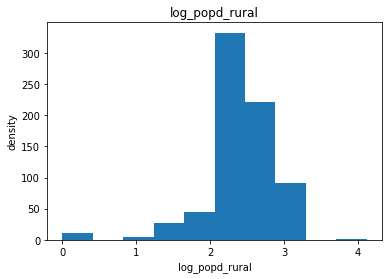

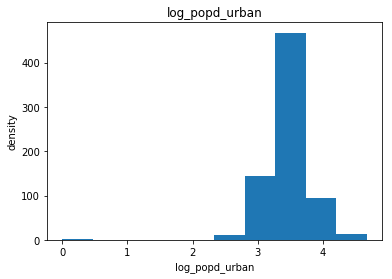

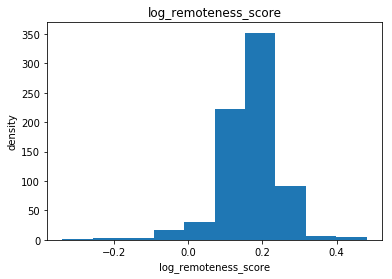

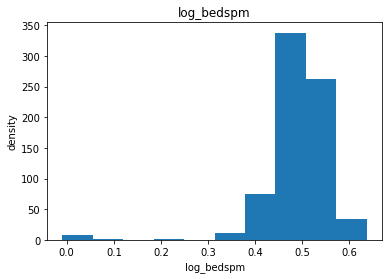

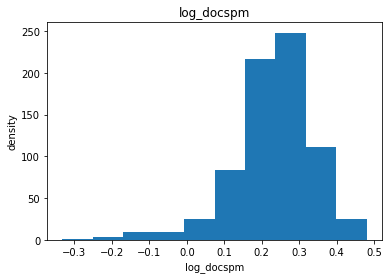

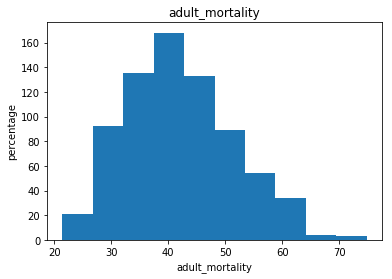

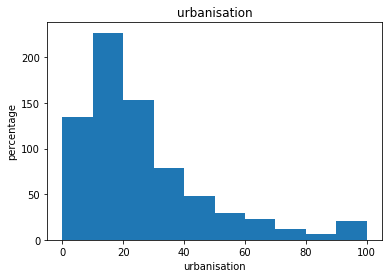

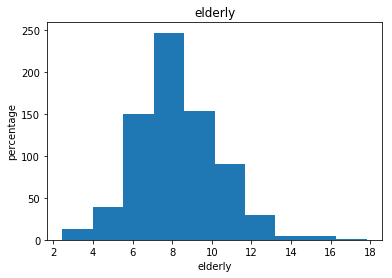

In [12]:
# lets look at histograms of vars 

# take log of some vars - how do we take logs? this is not working

## THIS SEEMS TO HAVE WORKED WITHOUT AN ISSUE, THE ERROR COMES ON THE PLOT LINE
indicators['log_popd_tot'] = np.log10(indicators['pop_density_total'])
## Because log 0 is undefined, we replace with a really small to stop errors
indicators['log_popd_rural'] = np.log10(indicators['pop_density_rural'].replace(0,1))
indicators['log_popd_urban'] = np.log10(indicators['pop_density_urban'].replace(0,1))
indicators['log_remoteness_score'] = np.log10(indicators['remoteness_score'].replace(0,1))
indicators['log_docspm'] = np.log10(indicators['docs_per_million'].replace(0,1))
indicators['log_bedspm'] = np.log10(indicators['beds_per_million'].replace(0,1))

# i don't know why I am doing this below line - can you explain?
## We basically create a "figure" that is sort of the empty canvas that will containt the plots. 
## We can create multiple ones of these and fill them simultaneously for different plots

## plot histograms of the logged vars
def scatter_function_allvars(var1):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    # pop_density_total
    ax.hist(indicators[var1])
    # set title and labels
    ax.set_title(var1)
    ax.set_xlabel(var1)
    ax.set_ylabel('density')

## plot histograms of the percentage vars
def scatter_function_percvars(var1):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    # pop_density_total
    ax.hist(indicators[var1])
    # set title and labels
    ax.set_title(var1)
    ax.set_xlabel(var1)
    ax.set_ylabel('percentage')

# histogram all vars
scatter_function_allvars('log_popd_tot')
scatter_function_allvars('log_popd_rural')
scatter_function_allvars('log_popd_urban')
scatter_function_allvars('log_remoteness_score')
scatter_function_allvars('log_bedspm')
scatter_function_allvars('log_docspm')
scatter_function_percvars('adult_mortality')
scatter_function_percvars('urbanisation')
scatter_function_percvars('elderly')


In [ ]:
# draw scatter plots of health care capacity vs other indicators

def scatter_function(var1, var2):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    plt.scatter(indicators[var1], indicators[var2])
    ax.set_title(var1)
    ax.set_ylabel(var2)

# docs per million
scatter_function('elderly','log_docspm')
scatter_function('urbanisation','log_docspm')
scatter_function('adult_mortality','log_docspm')
scatter_function('pop density - tot','log_docspm')
scatter_function('pop density - urban','log_docspm')
scatter_function('pop density - rural','log_docspm')
scatter_function('log_remoteness_score','log_docspm' 

# beds per  million
def scatter_function_bed(var1, var2):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    plt.scatter(indicators[var1], indicators[var2])
    ax.set_title(var1)
    ax.set_ylabel(var2)

scatter_function_bed('elderly','log_bedspm')
scatter_function_bed('urbanisation','log_bedspm')
scatter_function_bed('adult_mortality','log_bedspm')
scatter_function_bed('pop density - tot','log_bedspm')
scatter_function_bed('pop density - urban','log_bedspm')
scatter_function_bed('pop density - rural','log_bedspm')
scatter_function_bed('log_remoteness_score','log_bedspm') 

# adult mortality
                 
def scatter_function_am(var1, var2):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    plt.scatter(indicators[var1], indicators[var2])
    ax.set_title(var1)
    ax.set_ylabel(var2)

scatter_function_am('elderly','adult_mortality')
scatter_function_am('urbanisation','adult_mortality')
scatter_function_am('pop density - tot','adult_mortality')
scatter_function_am('pop density - urban','adult_mortality')
scatter_function_am('pop density - rural','adult_mortality')
scatter_function_am('log_remoteness_score','adult_mortality') 
                 
                

Text(0.5,1,'covid confirmed (log)')

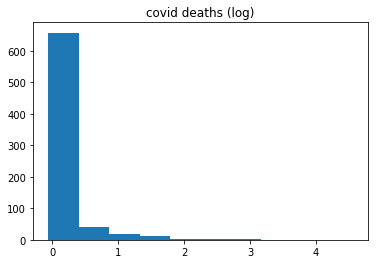

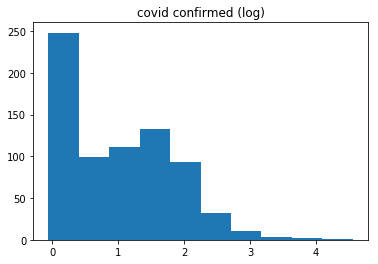

In [25]:
# distribution of COVID deaths and positives

# deaths
fig, ax = plt.subplots()
ax.hist(indicators['deceased_log'], bins = bins) ## we supply the bins to the next one
ax.set_title('covid deaths (log)')

# confirmed cases
fig, ax = plt.subplots()
ax.hist(indicators['confirmed_log'], bins = bins) ## we supply the bins to the next one
ax.set_title('covid confirmed (log)')





In [ ]:
# relationship of covid stats with other indicators

# deceased
def scatter_function_deceased(var1, var2):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    plt.scatter(indicators[var1], indicators[var2])
    ax.set_title(var1)
    ax.set_ylabel(var2)

scatter_function_deceased('elderly','deceased_log')
scatter_function_deceased('urbanisation','deceased_log')
scatter_function_deceased('adult_mortality','deceased_log')
scatter_function_deceased('pop density - tot','deceased_log')
scatter_function_deceased('pop density - urban','deceased_log')
scatter_function_deceased('pop density - rural','deceased_log')
scatter_function_deceased('log_remoteness_score','deceased_log') 


# confirmed cases

def scatter_function_confirmed(var1, var2):
    ## Note that within a function, we will indent all code by one tab at least
    fig, ax = plt.subplots()
    plt.scatter(indicators[var1], indicators[var2])
    ax.set_title(var1)
    ax.set_ylabel(var2)

scatter_function_confirmed('elderly','confirmed_log')
scatter_function_confirmed('urbanisation','confirmed_log')
scatter_function_confirmed('adult_mortality','confirmed_log')
scatter_function_confirmed('pop density - tot','confirmed_log')
scatter_function_confirmed('pop density - urban','confirmed_log')
scatter_function_confirmed('pop density - rural','confirmed_log')
scatter_function_confirmed('log_remoteness_score','confirmed_log')


In [22]:
# creating risk indices

# docs per million and bedspm
indicators['log_docspm'].quantile([0.25, 0.50 , 0.75])
indicators['log_bedspm'].quantile([0.25, 0.50 , 0.75])

if indicators['log_docspm'] < 0.17:
    indicators['docs_indice'] = 1 




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().